In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
data = pd.read_csv('customer_clustering.csv')
data.head()

,customer_id,full_name,total_booking,total_day_stayed,total_spent,total_services_used,total_services_spent
0,50,Customer 50,21,7,17886.0,26,5674
1,289,Customer 289,21,7,17807.0,20,5832
2,385,Customer 385,18,8,16574.0,27,5527
3,359,Customer 359,18,9,15828.0,30,7950
4,281,Customer 281,27,7,15492.0,30,7434


In [3]:
print(f'{data.dtypes}\n')
print(data.isnull().sum())

customer_id               int64
full_name                object
total_booking             int64
total_day_stayed          int64
total_spent             float64
total_services_used       int64
total_services_spent      int64
dtype: object

customer_id             0
full_name               0
total_booking           0
total_day_stayed        0
total_spent             5
total_services_used     0
total_services_spent    0
dtype: int64


In [4]:
data_features = ['total_booking', 'total_day_stayed', 'total_spent', 'total_services_used', 'total_services_spent']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[data_features])

In [5]:
data_scale = pd.DataFrame(data_scale)

In [6]:
im = SimpleImputer(strategy='mean')
data_fillna = im.fit_transform(data_scale)
data_scale = StandardScaler().fit_transform(data_fillna)

c:\Users\LENOVO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

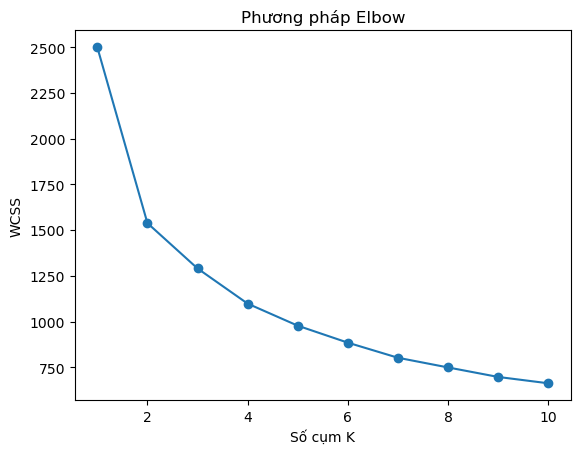

In [7]:
# Use Elbow find K
wcss = []
for i in range(1, 11):
    k = KMeans(n_clusters=i, random_state=42, n_init=10)
    k.fit(data_scale)
    wcss.append(k.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Số cụm K')
plt.ylabel('WCSS')
plt.title('Phương pháp Elbow')
plt.show()


In [ ]:
# Run K with value 3, 4, k ascending WSS des it => Stop
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster = kmeans.fit_predict(data_scale)

    print(f'K: {k}, WSS: {kmeans.inertia_}')

K: 3, WSS: 1290.4790144528208
K: 4, WSS: 1098.0945849560903


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
# Assess quality use Silhouete_Score(k gần 1)
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster = kmeans.fit_predict(data_scale)
    score = silhouette_score(data_scale, cluster)
    print(f'K: {k}, Score: {score:.2f}')

K: 3, Score: 0.25
K: 4, Score: 0.22


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
# Giảm dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scale)

# Chạy với K = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clus = kmeans.fit_predict(data_scale)


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


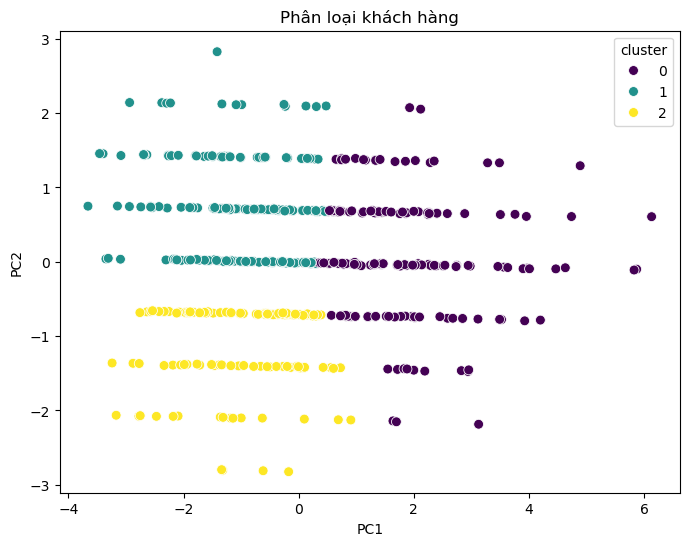

In [16]:
df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df['cluster'] = clus

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df, palette='viridis', s=50)
plt.title('Phân loại khách hàng')
plt.show()

In [33]:
data.drop(columns=['customer_id', 'full_name'], inplace=True)

In [34]:
data['cluster'] = clus
data_summa = data.groupby('cluster').mean()
data_summa

,total_booking,total_day_stayed,total_spent,total_services_used,total_services_spent
cluster,,,,,
0,15.280000,7.177143,8734.754286,19.862857,5308.382857
1,9.283505,7.963918,4507.046875,10.845361,2774.376289
2,9.587786,5.396947,4920.484375,10.839695,2785.916031
